# Predicting Heart Disease Using Classification 


## Introduction 

Cardiovascular diseases (CVDs) are the leading cause of death globally, taking an estimated 17.9 million lives each year. One of the best ways to reduce the mortality and severity of heart diseases is early detection in an individual.
Our dataset is created by hospitals and institutions from three different countries (Hungarian, Cleveland, and VA) and is taken from the UCI Machine Learning Repository(UCI Machine Learning Repository: Data Set) . The original database involves the variables such as age, sex, chest pain (cp), cholesterol (chol), resting blood pressure (trestbps), maximum heart rate achieved (thalach) etc. and a final column which classifies the presence of heart disease (angiographic disease status) where 0 represents the absence of heart disease and 1-4 represents the presence of heart disease.
In this project, we seek to utilize some commonly available medical metrics -- age, maximum heart rate achieved, and cholesterol-- to predict whether an individual has heart disease or not.


## Preliminary exploratory data analysis:

In [1]:
# loading all the required libraries. 
library(tidyverse) 
library(dplyr)
library(tidymodels) 
library(gridExtra)
library(repr)
set.seed(1)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [2]:
#Purpose of the cell: loading the required datasets, mutating and merging them
heart_data1 <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data", col_names=FALSE)
heart_data2 <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data", col_names=FALSE)
heart_data3 <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", col_names=FALSE)
heart_data4 <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data", col_names=FALSE)

# After exploring the heart_data-2, we noticed that it is missing value for many key predictors namely, cholestrol.
#Therefore, we decided to not use that one and bind the rest together

# we want to have almost equal amount of data from each location in our training and testing set and avoid any unluckiness,
# such as training out model based on data that are mostly from two locations and testing it on the testing set that
# mainly includes the third one. Therefore, we added the location, to use it later when spiliting our data into training and testing set.

hungarian_data <- heart_data1 %>%
    mutate (location = "Hungarian")
cleveland_data <- heart_data3 %>%
    mutate (location = "Cleveland")
va_data <- heart_data4 %>%
    mutate (location = "Va")

#merging the data from the various cities 
heart_data <- rbind (hungarian_data, cleveland_data, va_data)
#adding column names to the data 
colnames(heart_data) <- c("age", "sex", "cp", "trestbps", "chol", "fbs",  "restecg", "thalach", "exang",  "oldpeak", "slope",  "ca",  "thal", "num", "location")
#viewing the data
head(heart_data)

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_character(),
  X5 = col_character(),
  X6 = col_character(),
  X7 = col_character(),
  X8 = col_character(),
  X9 = col_character(),
  X10 = col_double(),
  X11 = col_character(),
  X12 = col_character(),
  X13 = col_character(),
  X14 = col_double()
)

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_character(),
  X5 = col_double(),
  X6 = col_character(),
  X7 = col_character(),
  X8 = col_character(),
  X9 = col_character(),
  X10 = col_character(),
  X11 = col_character(),
  X12 = col_character(),
  X13 = col_character(),
  X14 = col_double()
)

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_double(),
  X10 = col_double(),
  X11 = col_d

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,location
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
28,1,2,130,132,0,2,185,0,0,?,?,?,0,Hungarian
29,1,2,120,243,0,0,160,0,0,?,?,?,0,Hungarian
29,1,2,140,?,0,0,170,0,0,?,?,?,0,Hungarian
30,0,1,170,237,0,1,170,0,0,?,?,6,0,Hungarian
31,0,2,100,219,0,1,150,0,0,?,?,?,0,Hungarian
32,0,2,105,198,0,0,165,0,0,?,?,?,0,Hungarian


In [3]:
#tidying the data further by modifying num column to show weather the patient has heart disease or not
num <- heart_data %>%
    select (num) %>%
    mutate (num = as.character (num))
num [num == "1"] <- "Y"
num [num == "2"] <- "Y"
num [num == "3"] <- "Y"
num [num == "4"] <- "Y"
num [num == "0"] <- "N"
num <- num %>%
 mutate (num = as_factor (num))
#selecting the required columns 
# we are selecting the three predictors that we are using for this analysis. 
#The rest of the columns either were not numerical values or did not have a clear correlation with heart disease.

heart_data_selected <- heart_data%>%
    select (age, chol, thalach, location)
#merging the data again 
heart_data_merged <- cbind(heart_data_selected, num) %>%
    rename ("heart_disease" = "num")
#changing the data types of some columns 
heart_data_final <- heart_data_merged %>%
     mutate (chol = as.numeric (chol),
            thalach = as.numeric (thalach))           
head(heart_data_final)

heart_data_final

Warning message:
“Problem with `mutate()` input `chol`.
ℹ NAs introduced by coercion
ℹ Input `chol` is `as.numeric(chol)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”
Warning message:
“Problem with `mutate()` input `thalach`.
ℹ NAs introduced by coercion
ℹ Input `thalach` is `as.numeric(thalach)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”


,age,chol,thalach,location,heart_disease
,<dbl>,<dbl>,<dbl>,<chr>,<fct>
1,28,132,185,Hungarian,N
2,29,243,160,Hungarian,N
3,29,NA,170,Hungarian,N
4,30,237,170,Hungarian,N
5,31,219,150,Hungarian,N
6,32,198,165,Hungarian,N


age,chol,thalach,location,heart_disease
<dbl>,<dbl>,<dbl>,<chr>,<fct>
28,132,185,Hungarian,N
29,243,160,Hungarian,N
29,NA,170,Hungarian,N
30,237,170,Hungarian,N
31,219,150,Hungarian,N
32,198,165,Hungarian,N
32,225,184,Hungarian,N
32,254,155,Hungarian,N
33,298,185,Hungarian,N


### Separating the data into different data sets based on their location 

In [2]:
hungarian_data_cleaned <- heart_data_final %>%
    filter (location == "Hungarian")

cleveland_data_cleaned <- heart_data_final %>%
    filter (location == "Cleveland")

va_data_cleaned <- heart_data_final %>%
    filter (location == "Va")

ERROR: Error in heart_data_final %>% filter(location == "Hungarian"): could not find function "%>%"


### spliting the data into training and testing for each of those locations



In [4]:
#putting all of the training-set together
heart_data_training <- rbind (heart_data_training_hung, heart_data_training_clev, heart_data_training_va)


#putting all of the testing-set together
heart_data_testing <- rbind (heart_data_testing_hung, heart_data_testing_clev, heart_data_testing_va)

ERROR: Error in rbind(heart_data_training_hung, heart_data_training_clev, heart_data_training_va): object 'heart_data_training_hung' not found


In [5]:
#Goal of the cell: summarizing the data 

heart_data_cleaned_final <- heart_data_final %>%
    select (- location)

#calculating the mean 
predictors_mean <- heart_data_training %>%
    summarize(across (age:thalach, mean, na.rm = TRUE))

#using pivot_longer to show the mean value of each column in a table
predictors_mean_final <- pivot_longer(predictors_mean, 
                               cols = age:thalach, 
                               names_to = "predictors",
                              values_to = "mean")
predictors_mean_final

#counting the missing data 
na_count <- map_df(heart_data_cleaned_final, ~sum(is.na(.)))
#using pivot_longer to show the number of NAs in a table
na_count_final <- pivot_longer(na_count,
                               cols = age:heart_disease,
                               names_to = "predictors",
                              values_to = "number_of_nas")
na_count_final

#Proportion of heart disease 
heart_disease_proportion <- heart_data_training %>%
    group_by (heart_disease) %>%
    summarize (observation_number = n()) %>%
    mutate (percent = 100*observation_number/nrow(heart_data_training))
heart_disease_proportion  

predictors,mean
<chr>,<dbl>
age,52.93167
chol,228.95833
thalach,140.92819


predictors,number_of_nas
<chr>,<int>
age,0
chol,30
thalach,54
heart_disease,0


`summarise()` ungrouping output (override with `.groups` argument)



heart_disease,observation_number,percent
<fct>,<int>,<dbl>
N,303,50.5
Y,297,49.5


Warning message:
“Removed 43 rows containing missing values (geom_point).”
Warning message:
“Removed 33 rows containing missing values (geom_point).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 43 rows containing non-finite values (stat_bin).”


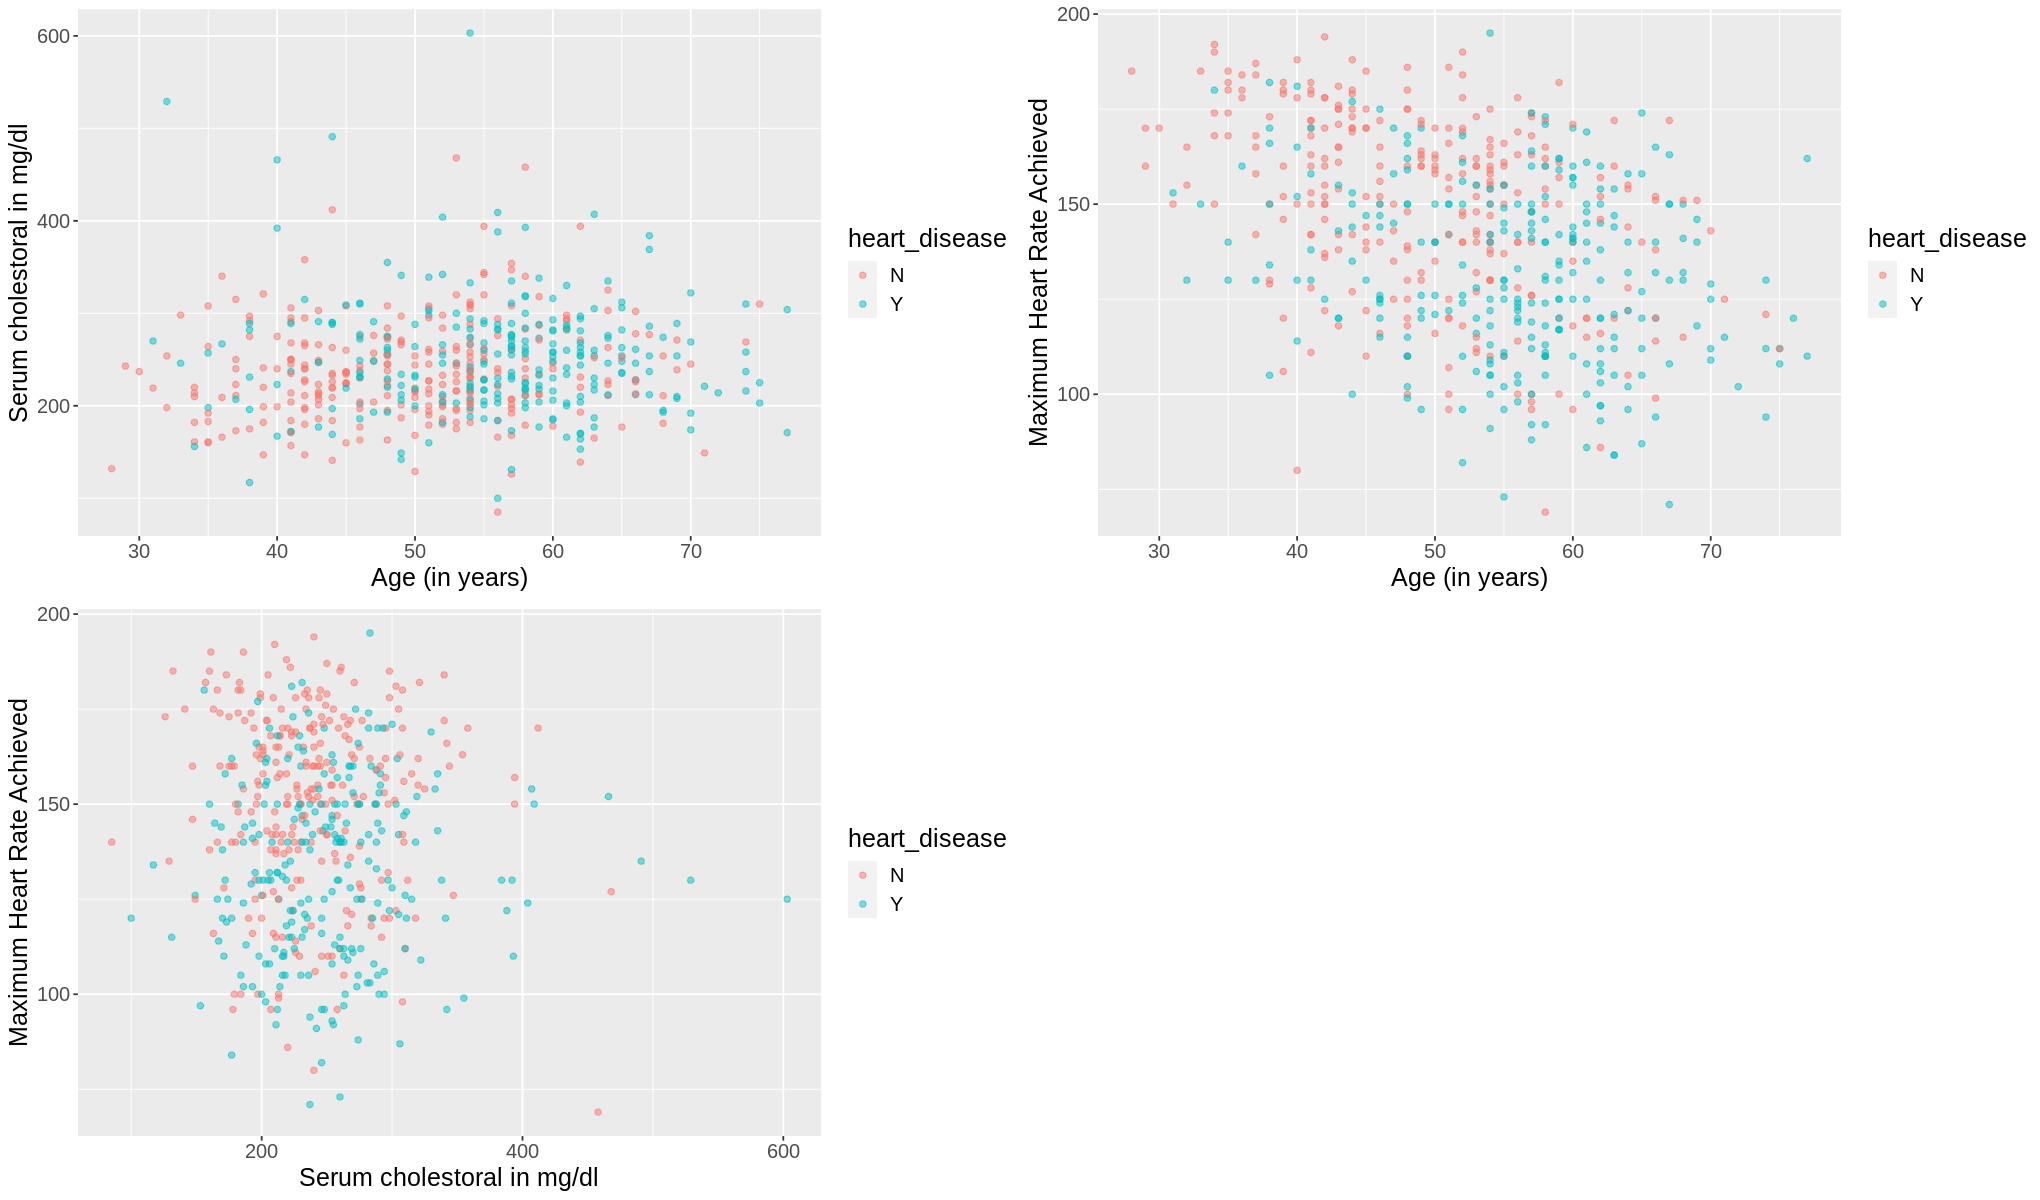

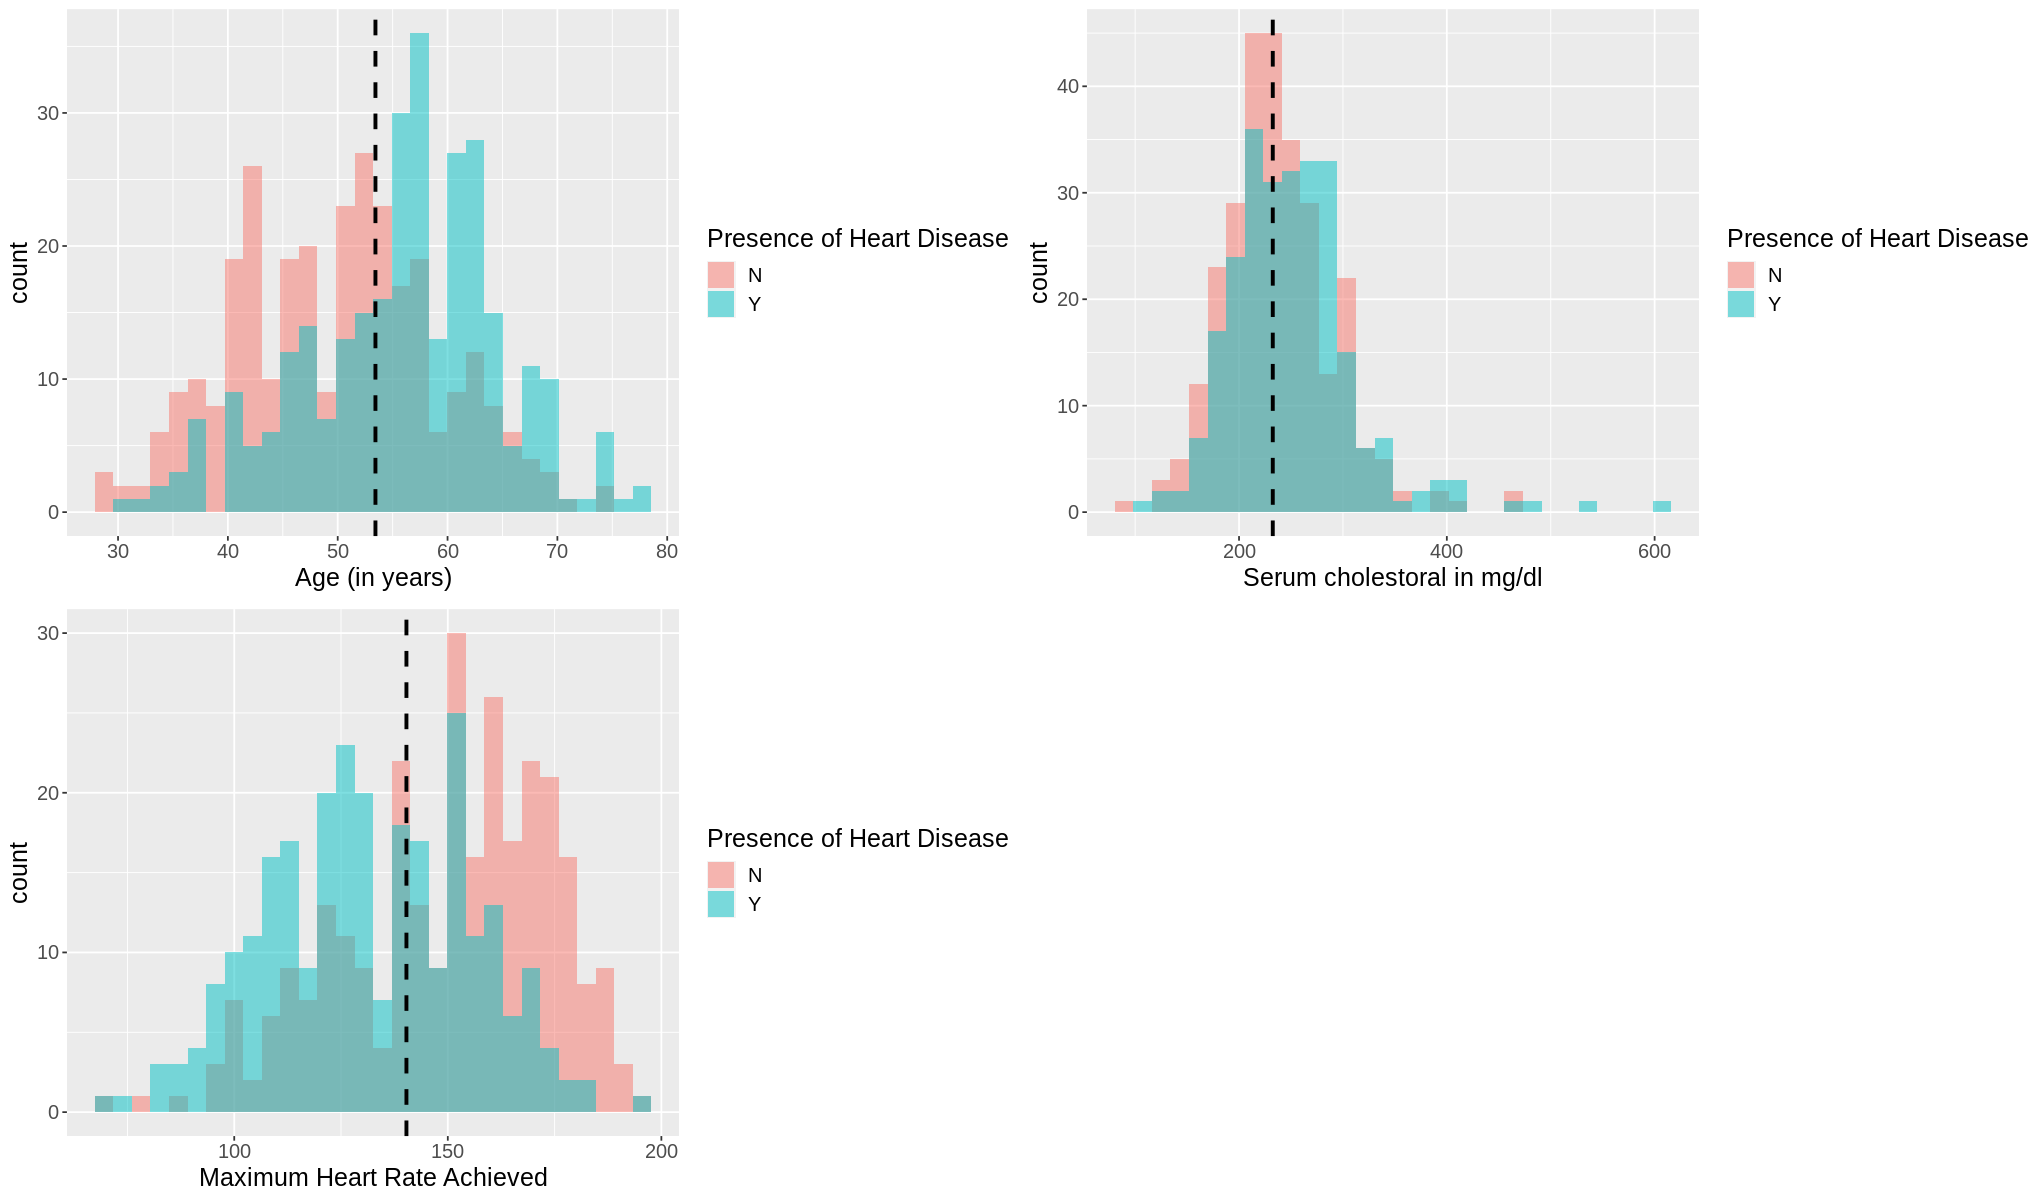

In [10]:
#visualising the data 

#changing the plot size 
options(repr.plot.height = 10, repr.plot.width=17)

# part 1: geom-points

age_chol <- heart_data_training %>% 
filter (chol != 0) %>%
ggplot(aes(x = age, y = chol, color = heart_disease)) + 
geom_point(stat = "identity", alpha = 0.5)+ 
labs(x="Age (in years)", y = "Serum cholestoral in mg/dl")+
theme (text = element_text (size = 15))

trestbps_age <- heart_data_training %>% 
ggplot(aes(x = age, y = thalach, color = heart_disease)) + 
geom_point(stat = "identity", alpha = 0.5)+
labs(x = "Age (in years)", y= "Maximum Heart Rate Achieved")+
theme (text = element_text (size = 15))

thalach_trestbps<- heart_data_training %>% 
filter (chol != 0) %>%
ggplot(aes(x = chol, y = thalach , color = heart_disease)) + 
geom_point(stat = "identity", alpha = 0.5)+
labs(x = "Serum cholestoral in mg/dl" , y= "Maximum Heart Rate Achieved")+
theme (text = element_text (size = 15))

grid.arrange(age_chol, trestbps_age, thalach_trestbps, nrow=2)

# part 2: histograms
age_plot <- heart_data_training %>% 
ggplot(aes(x = age, fill = as_factor(heart_disease))) + 
geom_histogram(alpha=0.5, position = "identity") + 
geom_vline(xintercept = 53.4350, linetype="dashed", size = 1.1)+
labs(x="Age (in years)", fill = "Presence of Heart Disease")+
theme (text = element_text (size = 15))

chol_plot <- heart_data_training %>% 
    filter (chol != 0) %>%
ggplot(aes(x = chol, fill = as_factor(heart_disease))) + 
geom_histogram(alpha=0.5, position = "identity") + 
geom_vline(xintercept = 232.4731, linetype="dashed", size = 1.1)+
labs(x="Serum cholestoral in mg/dl", fill = "Presence of Heart Disease")+
theme (text = element_text (size = 15))

thalach_plot <- heart_data_training %>% 
ggplot(aes(x = thalach, fill = as_factor(heart_disease))) + 
geom_histogram(alpha=0.5, position = "identity") +
geom_vline(xintercept = 140.3143, linetype="dashed", size = 1.1)+
labs(x = "Maximum Heart Rate Achieved", fill = "Presence of Heart Disease")+
theme (text = element_text (size = 15))

grid.arrange(age_plot, chol_plot, thalach_plot, nrow=2)


# Side notes:
# the added dashed lines for histograms represents the mean value of each predictor
# the 0 cholestrols are filtered for the purpose of better visualization


## Methods

The variables we plan on using in our model are: 
1. Age - [People age 65 and older are much more likely than younger people to suffer a heart attack, to have a stroke, or to develop heart disease and heart failure.](https://www.nia.nih.gov/health/heart-health-and-aging)(“Heart Health and Aging”). This can be due to the heart not being able to beat fast enough during physical activity or times of stress as it did earlier or due to the buildup of fatty deposits in the walls of arteries over the years. It is also evident from our plot that ss age increases, more proportion of people have heart disease; after the dashed line, representing the mean value, the ratio of people with heart disease is higher.
2. Cholesterol: [Increased amounts of cholesterol can build up in the wall of your arteries leading to the thinning of the arteries and ultimately leading to less blood flow to the heart muscle. This can lead to various heart diseases and even heart attacks, in some cases](https://www.webmd.com/heart-disease/guide/heart-disease-lower-cholesterol-risk)(“Cholesterol and Heart Disease"). Similarly, we can see in our scatter and histogram plots that people with cholesterol of over 200 mg/dl are more likely to have heart disease.
3. Maximum Heart Rate Achieved: [A higher heart rate is a good thing that leads to greater fitness](https://www.hopkinsmedicine.org/health/wellness-and-prevention/understanding-your-target-heart-rate)("Understanding Your Target Heart Rate"). A higher heart rate means that the heart is functioning well and is able to pump blood quickly and effectively. Lower maximum heart rate means that either the heart is unable to pump blood at higher speeds or that the person isn't doing activities that allow their heart rate to reach such levels, in most cases. Our plots also show that people who did not get to a certain maximum heart rate, around 140, had a significantly higher chance of heart failure. Furthermore, we are going to use the K-nearest neighbours classification algorithm to classify the new data points. We will first use our training data set to create a recipe and tuning and train the classifier using the cross-validation method. We then make predictions and evaluate our prediction's accuracy using the testing data set and visualize the result in the last step. To visualize the result of our analysis, we propose dividing the predictor variables into certain fixed intervals and figuring out what percentage of the people within that interval actually have heart diseases. This will allow us to create a bar chart with the percentage of people with heart disease on the y-axis and the intervals on the x-axis. In conjunction with this, we can also add an additional bar on each interval depicting the percentage of people with heart disease according to our classification model. This will allow us to see the relationship of the predictors with the target variable on the testing set and also allow us to judge the accuracy of our model.


## Expected Outcomes and Significance 

1-We are expecting to find that people with age higher than 50, Serum cholesterol greater than 200 mg/dl and maximum heart rate achieved less than 140  have heart disease.

2-According to this model, we will be able to predict whether people have heart disease early. So we can give them treatment early and therefore reduce the severity and mortality of heart disease. This will also give us an insight into what causes heart disease and allow for the prevention of heart diseases. 

3-Instead of predicting whether someone has heart disease or not, we can move over to predict the possibility of the person having heart disease. This will be much better at reducing mortality as even if the person does not have heart disease, we can see if they are at high risk for the disease and treat accordingly.

# Citations 

1. UCI Machine Learning Repository: Data Set, https://archive.ics.uci.edu/ml/datasets/Heart+Disease. 
2. “Heart Health and Aging.” National Institute on Aging, U.S. Department of Health and Human Services, https://www.nia.nih.gov/health/heart-health-and-aging. 
3. “Cholesterol and Heart Disease.” WebMD, WebMD, https://www.webmd.com/heart-disease/guide/heart-disease-lower-cholesterol-risk. 
4. “Understanding Your Target Heart Rate.” Johns Hopkins Medicine, https://www.hopkinsmedicine.org/health/wellness-and-prevention/understanding-your-target-heart-rate. 
